<a href="https://colab.research.google.com/github/doissegundos/Heart_Attack_Analysis_and_Prediction/blob/main/Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Attack Analysis and Prediction
Link do dataset: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


### Leitura dos dados

In [67]:
from google.colab import drive
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [68]:
#Importando o dataset do Github
df = pd.read_csv('https://raw.githubusercontent.com/doissegundos/Heart_Attack_Analysis_and_Prediction/main/dataset/heart.csv')

As variaveis desse dataset são:
 - Age : Idade do Paciente

- Sex: Sexo do paciente

- exang: angina induzida por exercício (1 = sim; 0 = não)

- ca: número de navios principais (0-3)

- cp: tipo de dor no peito tipo de dor no peito

  - Valor 1: angina típica
  - Valor 2: angina atípica
  - Valor 3: dor não anginosa
  - Valor 4: assintomático
- trtbps: pressão arterial em repouso (em mm Hg)

- chol: colestoral em mg / dl obtido por meio do sensor de IMC

- fbs: (açúcar no sangue em jejum> 120 mg / dl) (1 = verdadeiro; 0 = falso)

- rest_ecg: resultados eletrocardiográficos em repouso

  - Valor 0: normal
  - Valor 1: tendo anormalidade da onda ST-T (inversões da onda T e / ou elevação ou depressão do ST> 0,05 mV)
  - Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada

- target: 0 = menos chance de ataque cardíaco 1 = mais chance de ataque cardíaco

In [69]:
#Exibe 10 linhas do dataset aleatoriamente
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


In [70]:
#Faz uma descrição sobre algumas analises dos dados
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [71]:
#Verificando a possivel existencia de valores nulos dentro do dataset
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### trtbps - Pressão Arterial em repouso.

A pressão arterial saudável ideal para um adulto que está em repouso deve ser abaixo de 140/40 mmHg, logo vamos classificar a variavel trbps em dois grupos, sendo eles:
  - trtbps <= 140 - Pessoa Saldavel (0)
  - trtbps > 140 - Pessoa não Saldável (1)

In [72]:
df.trtbps

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trtbps, Length: 303, dtype: int64

In [73]:
# Definindo os valores em duas categorias
df.loc[df.trtbps <= 140, 'trtbps'] = 0
df.loc[df.trtbps > 140, 'trtbps'] = 1

In [74]:
df.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
40,51,0,2,0,308,0,0,142,0,1.5,2,1,2,1
162,41,1,1,0,157,0,1,182,0,0.0,2,0,2,1
101,59,1,3,1,270,0,0,145,0,4.2,0,0,3,1
44,39,1,2,0,321,0,0,182,0,0.0,2,0,2,1
107,45,0,0,0,236,0,0,152,1,0.2,1,0,2,1


In [75]:
df.trtbps.describe()

count    303.000000
mean       0.214521
std        0.411169
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: trtbps, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



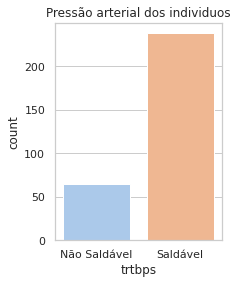

In [92]:
#Visualização da váriavel trtbps
df1 = df
# Definindo os valores em duas categorias
df1.loc[df1.trtbps == 0, 'trtbps'] = "Saldável"
df1.loc[df1.trtbps == 1, 'trtbps'] = "Não Saldável"

plt.figure(figsize=(3, 4))
sns.set_theme(style="whitegrid")
sns.countplot('trtbps',data=df1,palette="pastel")
plt.title('Pressão arterial dos individuos') 
plt.show()